In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import Distance
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic
from astroquery.gaia import Gaia

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Examen I Parcial AAF-511

## Problema 1

- Con los datos de la tabla que se le presenta a continuación haga lo siguiente:

- Convierta las coordenadas ecuatoriales a coordenadas galácticas.
- Usando las paralajes encuentre las distancias.
- Haga un gráfico de latitud vs. longitud galáctica. 
- Calcule la extinción $A_{V}$ para cada una de las estrellas.
- Calcule las magnitudes absolutas para cada una de las estrellas.
- Haga un gráfico de $M_{V}$ vs. indice de color.

In [2]:
df = pd.read_csv('Table_exam1.csv')
df

,HD,Nombre,V,B-V,E(B-V),AR,DEC,p(marcsec)
0,886,gamma Peg,2.84,-0.23,0.01,3.308968,15.183598,6.896551
1,2905,kappa Cas,4.17,0.13,0.35,8.249963,62.931783,0.991080
2,5394,gamma Cas,2.58,-0.20,0.08,14.177213,60.716740,5.154639
3,10516,kappa Per,4.09,-0.04,0.20,47.374182,44.857458,7.299270
4,24398,zeta Per,2.87,0.11,0.33,58.533010,31.883634,2.538071
5,24760,epsilon Per,2.90,-0.18,0.08,59.463467,40.010215,3.246753
6,30614,alpha Cam,4.29,0.02,0.32,73.512543,66.342677,0.859106
7,36486,delta Ori,2.23,-0.23,0.07,83.001667,-0.299095,2.604166
8,37128,epsilon Ori,1.70,-0.19,0.08,84.053389,-1.201919,2.444987
9,37202,zeta Tau,2.95,-0.19,0.05,84.411189,21.142544,6.896551


### Convierta las coordenadas ecuatoriales a coordenadas galácticas.

In [3]:
rd = SkyCoord(ra = (df['AR'].values)*u.degree, dec = (df['DEC'].values)*u.degree, frame = 'fk5')
rd

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    [( 3.308968,  15.183598), ( 8.249963,  62.931783),
     (14.177213,  60.71674 ), (47.374182,  44.857458),
     (58.53301 ,  31.883634), (59.463467,  40.010215),
     (73.512543,  66.342677), (83.001667,  -0.299095),
     (84.053389,  -1.201919), (84.411189,  21.142544),
     (85.189694,  -1.942574), (86.499563, -32.306434),
     (86.93912 ,  -9.669605), (95.674939, -17.955919)]>

In [4]:
lb = rd.transform_to('galactic')
lb

<SkyCoord (Galactic): (l, b) in deg
    [(109.43380456, -46.68448459), (120.83614145,   0.13508737),
     (123.57686775,  -2.14840804), (147.12323536, -11.43213919),
     (162.2891295 , -16.69038627), (157.35379039, -10.08845791),
     (144.06557469,  14.04238256), (203.85591409, -17.7397371 ),
     (205.21206346, -17.2417319 ), (185.68637306,  -5.63604552),
     (206.45217681, -16.58516825), (237.28615766, -27.10207779),
     (214.51433304, -18.49646989), (226.05984258, -14.2680491 )]>

### Usando las paralajes encuentre las distancias.

In [5]:
Distancia= Distance(parallax=u.Quantity((df['p(marcsec)'].values)*u.mas))
Distancia

<Distance [ 145.00001523, 1009.00028252,  194.0000066 ,  137.00000137,
            394.00001024,  308.00002341, 1164.00071702,  384.0000983 ,
            409.00012965,  145.00001523,  352.00001126,  701.00025727,
            520.0002496 ,  206.00003955] pc>

### Haga un gráfico de latitud vs. longitud galáctica.

Vamos a definir unas variables:

In [6]:
Long_galac = lb.l
Lati_galac = lb.b

In [7]:
df['Long(l)'] = Long_galac.value
df['Lati(b)'] = Lati_galac.value

<IPython.core.display.Javascript object>


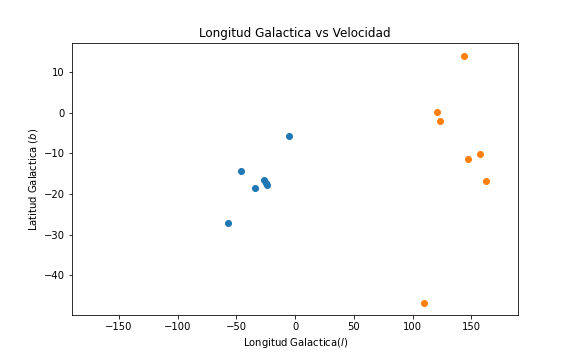

In [30]:
fig,ax = plt.subplots(figsize=(8,5))

discr180 = (df['Long(l)']>=180)
discr0 = (df['Long(l)']<180)
ax.scatter(180-df['Long(l)'][discr180], df['Lati(b)'][discr180])
ax.scatter(df['Long(l)'][discr0], df['Lati(b)'][discr0])

ax.set_xlim(190,-190)
ax.set_xlabel(r'Longitud Galactica($l$)')
ax.set_ylabel(r'Latitud Galactica ($b$) ')
ax.set_title("Longitud Galactica vs Velocidad")
plt.gca().invert_xaxis()

### Calcule la extinción $A_{V}$ para cada una de las estrellas.

La formula para la Extinción para nuestra galaxia en promedio es:

$$ A_{\nu} = (3.1 \pm 0.1)E(B-V) $$
No vamos a tomar en cuenta el error:

In [9]:
A_nu = (3.1*df['E(B-V)'].values)*u.mag
A_nu

<Quantity [0.031, 1.085, 0.248, 0.62 , 1.023, 0.248, 0.992, 0.217, 0.248,
           0.155, 0.248, 0.031, 0.217, 0.   ] mag>

### Calcule las magnitudes absolutas para cada una de las estrellas.

### Calculando la magnitud absoluta

$$ M = m - distmod - A_{\nu} $$

In [10]:
Modulo_Distancia = Distancia.distmod
Modulo_Distancia

<Quantity [ 5.80684024, 10.01945644,  6.43900872,  5.68360286,  7.97748117,
            7.44275375, 10.32976624,  7.92165668,  8.05861723,  5.80684024,
            7.73271339,  9.22859089,  8.58001776,  6.56933652] mag>

In [11]:
m = (df['V'].values)*u.mag

In [12]:
M = m - Modulo_Distancia - A_nu
M

<Quantity [-2.99784024, -6.93445644, -4.10700872, -2.21360286, -6.13048117,
           -4.79075375, -7.03176624, -5.90865668, -6.60661723, -3.01184024,
           -6.21071339, -4.09959089, -6.70701776, -4.59933652] mag>

### Haga un gráfico de $M_{V}$ vs. indice de color.

In [13]:
Color = (df['B-V'].values)*u.mag
Color

<Quantity [-0.23,  0.13, -0.2 , -0.04,  0.11, -0.18,  0.02, -0.23, -0.19,
           -0.19, -0.21, -0.29, -0.18, -0.24] mag>

<IPython.core.display.Javascript object>


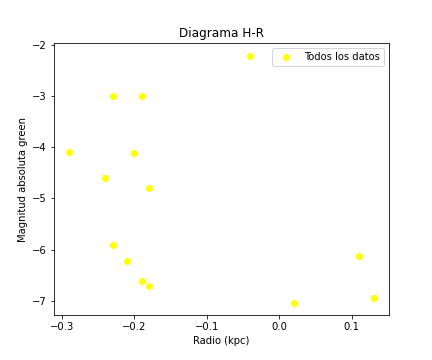

In [32]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(Color.value, M.value, 'o', label='Todos los datos', color = 'yellow')
ax.set_xlabel("Color B-V")
ax.set_ylabel("Magnitud absoluta green")
ax.set_title("Diagrama H-R")
ax.legend()

## Problema 2

- En el articulo de Li et al. 2019 (https://doi.org/10.3847/1538-4357/ab0104) encontraron que las constantes de Oort son A=15.1, B=-13.4, C=-2.7 y K=-1.7 km s$^{-1}$ kpc$^{-1}$, con $u_{0}=10.26$, $\upsilon_{0}=24.20$ y $w_{0}=8.32$ km s$^{-1}$. Usando los datos de 100 estrellas de GAIA y las ecuaciones del articulo:

$$\mu_{l}(l, b, \omega) = (A \cos{2l} - C \sin{2l} + B)\cos{b} +\omega(u_{0}\sin{l}-\upsilon_0 \cos{l})$$

$$\mu_{b}(l,b,v)=-(A\sin{2l}+C\cos{2l}+K)\sin{b}\cos{b} + \omega[(u_{0}\cos{l} + \upsilon_{0} \sin{l})\sin{b} - w_{0} \cos{b}]$$

encuentre los movimientos propios $\mu_{l}$ y $\mu_{b}$.

- Haga los gráficos de $\mu_{l}$ vs. longitud galáctica y $\mu_{b}$ vs. longitud galáctica.
- Calcule las magnitudes de los movimientos propios en coordenadas galácticas y encuentre la velocidad en km s$^{-1}$.
- Calcule las magnitudes de los movimientos propios usando el movimientos propio en coordenadas ecuatoriales de la tabla y encuentre la velocidad en km s$^{-1}$. 
- Compare los resultados de los dos incisos anteriores.

In [15]:
query_text = '''SELECT TOP 1600 ra, dec, parallax, pmra, pmdec, radial_velocity,
phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr3.gaia_source
WHERE parallax_over_error > 10 AND
    parallax > 4 AND
    phot_bp_mean_flux_over_error > 10 AND
    phot_rp_mean_flux_over_error > 10 AND
    radial_velocity IS NOT null
ORDER BY random_index
'''

In [17]:
job = Gaia.launch_job(query_text)
gaia_data = job.get_results()

In [18]:
gaia_data

ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mas / yr,mas / yr,km / s,mag,mag,mag
float64,float64,float64,float64,float64,float32,float32,float32,float32
171.80987737943448,-12.086809574893953,7.191948381963115,80.77308417540777,31.038118561648464,0.0791312,13.987773,14.809981,12.990531
18.466531809347487,2.87878976386266,5.08382985708441,76.83054055120988,-11.105692960463237,24.974974,10.119948,10.387577,9.682716
104.92701163632249,63.24594185254482,5.881378619821566,-12.021013647907584,12.878513185859322,-19.423811,14.750455,15.776505,13.74654
329.22119244522736,56.63317207594698,4.8666916640832625,-28.08330414258523,2.514321404968325,-103.996155,14.473897,15.290248,13.5195055
129.9709255450639,27.631570971904303,7.513264990316233,-4.753118771321455,-7.496507650347014,-56.61028,10.025202,10.364753,9.515762
132.10459270933268,2.271051596123523,12.599344304105063,4.013977357436915,66.10200703095197,35.98448,11.123108,11.694805,10.408632
88.83105887052048,13.548943405272674,8.529614872196044,30.145566649225604,-41.55845921307802,79.80503,14.496056,15.714214,13.398944
77.0356559609996,-76.38573602851461,4.032150917693865,-35.29836308677816,-16.338243335376237,40.058613,13.268149,13.825207,12.559783


Definimos algunas constantes:

In [19]:
A=(15.1)*u.km*(u.s**(-1))*(u.kpc**(-1))
B=-(13.4)*u.km*(u.s**(-1))*(u.kpc**(-1))
C=-(2.7)*u.km*(u.s**(-1))*(u.kpc**(-1))
K=-(1.7)*u.km*(u.s**(-1))*(u.kpc**(-1))
u_0 = 10.26*u.km/u.s
v_0 = 24.20*u.km/u.s
w_0 = 8.32*u.km/u.s

### Encuentre los movimientos propios $\mu_{l}$ y $\mu_{b}$.

In [20]:
r_d = SkyCoord(ra = gaia_data['ra'], dec = gaia_data['dec'], frame = 'fk5')

In [21]:
l_b = r_d.transform_to('galactic')
l_b

<SkyCoord (Galactic): (l, b) in deg
    [(272.69200273,  45.78317312), (134.02001562, -59.50924871),
     (152.67565069,  24.9371207 ), ..., (145.83951876, -19.36870698),
     (359.58178262, -18.27289554), (  4.28510756,  12.01352086)]>

In [22]:
l = l_b.l
b = l_b.b
w = (gaia_data['parallax'].value)*u.mas
w

<Quantity [ 7.19194838,  5.08382986,  5.88137862, ...,  6.8265335 ,
           10.582448  ,  4.92439195] mas>

Segun el paper w es el parallax

### $\mu_{l}$ :

In [23]:
mu_l = ((A*np.cos(2*l)-C*np.sin(2*l)+ B)*np.cos(b)) + (Distance(parallax=u.Quantity(gaia_data['parallax'])))**(-1)*(u_0*np.sin(l)- v_0*np.cos(l))
mu_l

<Quantity [-101.88776438,  114.57161959,  147.92219098, ...,  166.28166951,
           -255.30561671, -113.17060721] km / (kpc s)>

Grafico:

In [24]:
gaia_data['Lon(l)'] = l.value
gaia_data['Lat(b)'] = b.value

<IPython.core.display.Javascript object>


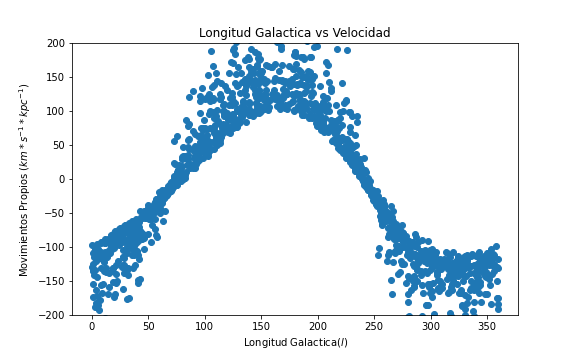

Text(0.5, 1.0, 'Longitud Galactica vs Velocidad')

In [25]:
fig,ax = plt.subplots(figsize=(8,5))

discr180 = (gaia_data['Lon(l)']>=180)
discr0 = (gaia_data['Lat(b)']<180)
ax.set_ylim(-200,200)
ax.scatter(gaia_data['Lon(l)'], mu_l)
ax.set_xlabel(r'Longitud Galactica($l$)')
ax.set_ylabel(r'Movimientos Propios ($km*s^{-1}*kpc^{-1}$) ')
ax.set_title("Longitud Galactica vs Velocidad")

### $\mu_{b}$ :

In [26]:
mu_b = -(A*np.sin(2*l)+C*np.cos(2*l) + K)*(np.sin(b)*np.cos(b)) + (Distance(parallax=u.Quantity(gaia_data['parallax'])))**(-1)*((u_0*np.cos(l) + v_0*np.sin(l))*np.sin(b)-w_0*np.cos(b))
mu_b

<Quantity [-163.63222949,  -73.76410616,  -33.4726533 , ...,  -70.3601092 ,
           -118.43795872,  -27.30187107] km / (kpc s)>

<IPython.core.display.Javascript object>


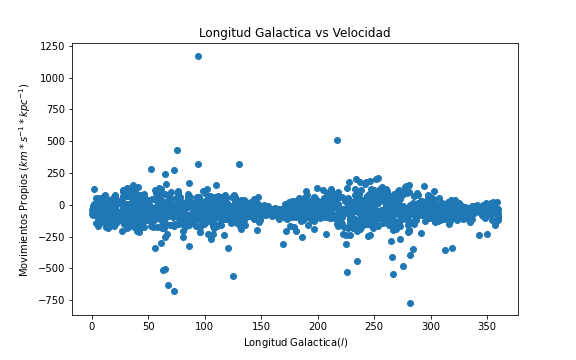

Text(0.5, 1.0, 'Longitud Galactica vs Velocidad')

In [27]:
fig,ax = plt.subplots(figsize=(8,5))

discr180 = (gaia_data['Lon(l)']>=180)
discr0 = (gaia_data['Lat(b)']<180)
ax.scatter(gaia_data['Lon(l)'], mu_b)
ax.set_xlabel(r'Longitud Galactica($l$)')
ax.set_ylabel(r'Movimientos Propios ($km*s^{-1}*kpc^{-1}$) ')
ax.set_title("Longitud Galactica vs Velocidad")

In [28]:
V_tan_pro = np.sqrt((mu_l)**2 + (mu_b)**2)
V_tan_pro

<Quantity [192.76053294, 136.26371261, 151.66210174, ..., 180.55508461,
           281.44006109, 116.41726032] km / (kpc s)>

In [29]:
V_tan = V_tan_pro*((Distance(parallax=u.Quantity(gaia_data['parallax']))).to(u.kpc))
V_tan

<Quantity [26.80226869, 26.80335818, 25.78682849, ..., 26.44901468,
           26.59498643, 23.64094116] km / s>